# Differences of SMI in the counties of Olpe (OE) and Hochsauerlandkreis (HSK)

The main idea behind this activity is to show the comparison of cumulative precipitation in counties of interest.
To evaluate this, the investigation regions precipitation rate was compared to the same four-month period in 2018. 
To better understand, the cumulative precipitation rate of each county has been calculated separately

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

In [39]:
data = pd.read_csv('C:/Users/tazbirul/Downloads/Geoinformatics/Exam/MIE_2.02_WS2021_II_Exam-master/exercise_4/data/generated/DWD/hourly/precipitation/historical/prec_ts_merged_Ex5_data.csv',sep=";")

In [40]:
data.tail()

,station_id,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state
257342,15000,2018-08-16 19:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257343,15000,2018-08-16 20:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257344,15000,2018-08-16 21:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257345,15000,2018-08-16 22:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257346,15000,2018-08-16 23:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen


In [41]:
data['onlyDay'] = pd.to_datetime(data['mess_datum'])

In [42]:
day = data['onlyDay'].dt.date

In [43]:
data.tail()

,station_id,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state,onlyDay
257342,15000,2018-08-16 19:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen,2018-08-16 19:00:00
257343,15000,2018-08-16 20:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen,2018-08-16 20:00:00
257344,15000,2018-08-16 21:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen,2018-08-16 21:00:00
257345,15000,2018-08-16 22:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen,2018-08-16 22:00:00
257346,15000,2018-08-16 23:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen,2018-08-16 23:00:00


In [44]:
data['mess_datum']=pd.to_datetime(data.mess_datum, format='%Y/%m/%d %H:%M:%S')

In [45]:
del data['day']
data.insert(loc=6, column='date', value=(data.mess_datum.dt.date))

In [46]:
data.head()

,station_id,mess_datum,prec_rate,date_from,date_to,altitude,date,latitude,longitude,name,state,onlyDay
0,216,2018-04-16 00:00:00,0.0,2004-10-01,2022-03-11,298,2018-04-16,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,2018-04-16 00:00:00
1,216,2018-04-16 01:00:00,0.0,2004-10-01,2022-03-11,298,2018-04-16,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,2018-04-16 01:00:00
2,216,2018-04-16 02:00:00,0.0,2004-10-01,2022-03-11,298,2018-04-16,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,2018-04-16 02:00:00
3,216,2018-04-16 03:00:00,0.0,2004-10-01,2022-03-11,298,2018-04-16,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,2018-04-16 03:00:00
4,216,2018-04-16 04:00:00,0.0,2004-10-01,2022-03-11,298,2018-04-16,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,2018-04-16 04:00:00


In [47]:
#del data['onlyDay'] 

In [48]:
data = data.groupby(['date','station_id'])['prec_rate'].sum().to_frame(name = 'daily_prep').reset_index()

In [49]:
data.tail()

,date,station_id,daily_prep
10731,2018-08-16,13671,0.0
10732,2018-08-16,13696,0.0
10733,2018-08-16,13700,0.0
10734,2018-08-16,13713,0.0
10735,2018-08-16,15000,0.0


In [50]:
data['station_id'] = data['station_id'].astype(int)
type(data['station_id'])

pandas.core.series.Series

In [51]:
#11 stations are missing because ther eis no precipitation data

Olpe = data[data['station_id'].isin([216,2947,5468])]
Hoexter = data[data['station_id'].isin([613,644,5347])]
SiegenWTGstein = data[data['station_id'].isin([389,390,796,4692])]
MarkisherKreis = data[data['station_id'].isin([3098,3499,13713])]
HSK = data[data['station_id'].isin([1300,2483,3215,4488,6264,7330])]
OberbergisherKreis = data[data['station_id'].isin([4127,5619])]
EnnepeRuhrKreis = data[data['station_id'].isin([6313,13700])]
Unna = data[data['station_id'].isin([6276])]
Soest = data[data['station_id'].isin([3031,4313,4400,5360,5480])]
Paderborn = data[data['station_id'].isin([934,3028,4368,5699])] 

In [52]:
Olpe

,date,station_id,daily_prep
0,2018-04-16,216,0.0
34,2018-04-16,2947,0.0
64,2018-04-16,5468,0.0
88,2018-04-17,216,0.0
122,2018-04-17,2947,0.0
...,...,...,...
10596,2018-08-15,2947,0.0
10625,2018-08-15,5468,0.0
10649,2018-08-16,216,0.0
10683,2018-08-16,2947,0.0


In [53]:
#Each county daily average precipitation

Olpe = Olpe.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Hoexter = Hoexter.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index() 
SiegenWTGstein = SiegenWTGstein.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
MarkisherKreis = MarkisherKreis.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
HSK = HSK.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
OberbergisherKreis = OberbergisherKreis.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
EnnepeRuhrKreis = EnnepeRuhrKreis.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Unna = Unna.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Soest = Soest.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()
Paderborn = Paderborn.groupby(['date'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()


In [54]:
#Each county daily cumilating precipitation

Olpe.insert(loc=2, column='Olpe', value=(np.cumsum(Olpe['avg_daily_prep'])))
Hoexter.insert(loc=2, column='Hoexter', value=(np.cumsum(Hoexter['avg_daily_prep'])))
SiegenWTGstein.insert(loc=2, column='Siegen_WTG', value=(np.cumsum(SiegenWTGstein['avg_daily_prep'])))
MarkisherKreis.insert(loc=2, column='Maerkisher_Kreis', value=(np.cumsum(MarkisherKreis['avg_daily_prep'])))
HSK.insert(loc=2, column='HSK', value=(np.cumsum(HSK['avg_daily_prep'])))
OberbergisherKreis.insert(loc=2, column='Oberbergisher_Kreis', value=(np.cumsum(OberbergisherKreis['avg_daily_prep'])))
EnnepeRuhrKreis.insert(loc=2, column='Ennepe_Ruhr_Kreis', value=(np.cumsum(EnnepeRuhrKreis['avg_daily_prep'])))
Unna.insert(loc=2, column='Unna', value=(np.cumsum(Unna['avg_daily_prep'])))
Soest.insert(loc=2, column='Soest', value=(np.cumsum(Soest['avg_daily_prep'])))
Paderborn.insert(loc=2, column='Paderborn', value=(np.cumsum(Paderborn['avg_daily_prep'])))


In [55]:
Olpe.tail()
HSK

,date,avg_daily_prep,HSK
0,2018-04-16,0.000000,0.000000
1,2018-04-17,0.000000,0.000000
2,2018-04-18,0.000000,0.000000
3,2018-04-19,0.000000,0.000000
4,2018-04-20,0.000000,0.000000
...,...,...,...
118,2018-08-12,0.000000,195.673333
119,2018-08-13,11.916667,207.590000
120,2018-08-14,1.250000,208.840000
121,2018-08-15,0.000000,208.840000


In [56]:
df1 = df = pd.DataFrame({"Olpe":[Olpe["Olpe"].max()],
                         "Hoexter":[Hoexter["Hoexter"].max()],
                         "SiegenWTGstein":[SiegenWTGstein["Siegen_WTG"].max()],
                         "MarkisherKreis":[MarkisherKreis["Maerkisher_Kreis"].max()],
                         "HSK":[HSK["HSK"].max()],
                         "OberbergisherKreis":[OberbergisherKreis["Oberbergisher_Kreis"].max()],
                         "EnnepeRuhrKreis":[EnnepeRuhrKreis["Ennepe_Ruhr_Kreis"].max()],
                         "Soest":[Soest["Soest"].max()],
                         "Paderborn":[Paderborn["Paderborn"].max()]
                         })

df1.index.names = ['name']
df_t = df1.T
df_t = df_t.sort_values(by=0,ascending=False)
df_t.rename( columns={0 :'Cumulative Precipitation'}, inplace=True )
df_t

name,Cumulative Precipitation
Olpe,238.966667
HSK,208.840000
EnnepeRuhrKreis,198.800000
Soest,189.020000
MarkisherKreis,181.200000
OberbergisherKreis,172.550000
SiegenWTGstein,166.925000
Paderborn,157.591667
Hoexter,121.566667


### Plotting Cumulative precipitation

##### Plotting cumulative precipitation of the 10 Counties separately in one diagram  

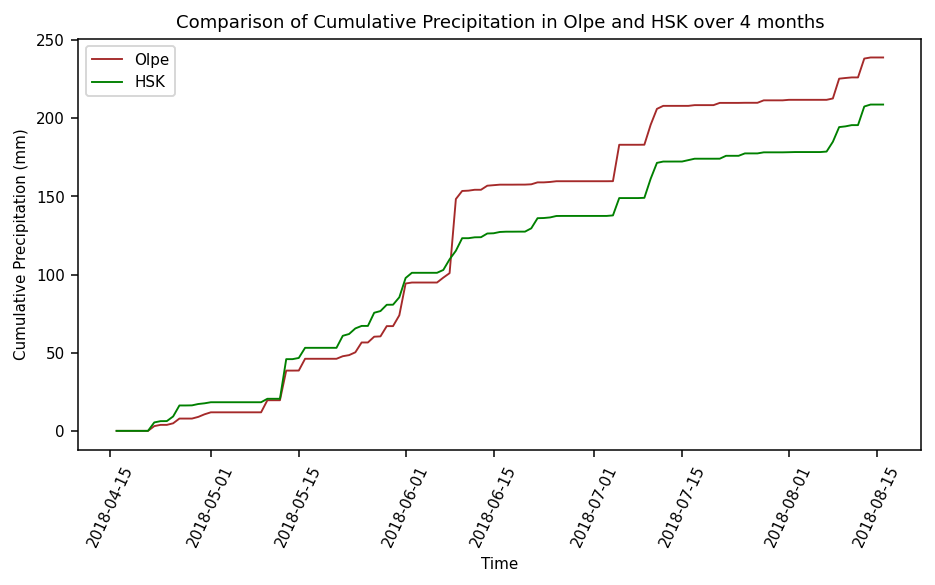

In [57]:
fig = plt.figure(dpi= 136, figsize=(8,4))
plt.rcParams.update({'font.size': 8})

plt.plot('date','Olpe',  data=Olpe, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('date','HSK',  data=HSK, marker='', markerfacecolor='green',  color='green', linewidth=1)

plt.legend()

plt.xlabel('Time')
plt.ylabel('Cumulative Precipitation (mm)')
plt.title('Comparison of Cumulative Precipitation in Olpe and HSK over 4 months')
plt.xticks(rotation=65)

plt.show()

In [58]:
from datetime import datetime
Olpe.set_index("date", inplace = True)
HSK.set_index("date", inplace = True)

Olpe_and_HSK = pd.merge(Olpe,HSK,  how='inner', left_on = 'date', right_on = 'date')
Olpe_and_HSK.rename(columns={'Olpe':'cumilative_prep_Olpe'}, inplace=True)
Olpe_and_HSK.rename(columns={'HSK':'cumilative_prep_HSK'}, inplace=True)
Olpe_and_HSK.reset_index(inplace=True)
Olpe_and_HSK.tail()

,date,avg_daily_prep_x,cumilative_prep_Olpe,avg_daily_prep_y,cumilative_prep_HSK
118,2018-08-12,0.000000,226.200000,0.000000,195.673333
119,2018-08-13,12.066667,238.266667,11.916667,207.590000
120,2018-08-14,0.700000,238.966667,1.250000,208.840000
121,2018-08-15,0.000000,238.966667,0.000000,208.840000
122,2018-08-16,0.000000,238.966667,0.000000,208.840000


In [59]:
startdate1 = pd.to_datetime("2018-04-16").date()
enddate1= pd.to_datetime("2018-05-16").date()

startdate2 = pd.to_datetime("2018-05-15").date()
enddate2= pd.to_datetime("2018-06-16").date()

startdate3 = pd.to_datetime("2018-06-15").date()
enddate3= pd.to_datetime("2018-07-16").date()

startdate4 = pd.to_datetime("2018-07-15").date()
enddate4= pd.to_datetime("2018-08-16").date()

Olpe_and_HSK.set_index("date", inplace = True)
#Olpe_and_HSK.set_index("date", inplace = True)
may = Olpe_and_HSK.loc[startdate1:enddate1]
june = Olpe_and_HSK.loc[startdate2:enddate2]
july = Olpe_and_HSK.loc[startdate3:enddate3]
aug = Olpe_and_HSK.loc[startdate4:enddate4]


In [60]:
june['avg_daily_prep_x']

date
2018-05-15     0.033333
2018-05-16     7.533333
2018-05-17     0.000000
2018-05-18     0.000000
2018-05-19     0.000000
2018-05-20     0.000000
2018-05-21     0.000000
2018-05-22     1.633333
2018-05-23     0.700000
2018-05-24     1.800000
2018-05-25     6.300000
2018-05-26     0.000000
2018-05-27     3.700000
2018-05-28     0.200000
2018-05-29     6.566667
2018-05-30     0.000000
2018-05-31     6.933333
2018-06-01    20.333333
2018-06-02     0.633333
2018-06-03     0.000000
2018-06-04     0.000000
2018-06-05     0.000000
2018-06-06     0.000000
2018-06-07     3.133333
2018-06-08     2.866667
2018-06-09    47.433333
2018-06-10     5.166667
2018-06-11     0.200000
2018-06-12     0.566667
2018-06-13     0.000000
2018-06-14     2.600000
2018-06-15     0.333333
2018-06-16     0.333333
Name: avg_daily_prep_x, dtype: float64

In [61]:
june['avg_daily_prep_y']

date
2018-05-15     0.766667
2018-05-16     6.483333
2018-05-17     0.000000
2018-05-18     0.000000
2018-05-19     0.000000
2018-05-20     0.000000
2018-05-21     0.000000
2018-05-22     7.700000
2018-05-23     1.133333
2018-05-24     3.583333
2018-05-25     1.600000
2018-05-26     0.000000
2018-05-27     8.433333
2018-05-28     1.083333
2018-05-29     4.016667
2018-05-30     0.050000
2018-05-31     4.750000
2018-06-01    12.333333
2018-06-02     3.333333
2018-06-03     0.000000
2018-06-04     0.000000
2018-06-05     0.000000
2018-06-06     0.000000
2018-06-07     1.816667
2018-06-08     6.800000
2018-06-09     5.480000
2018-06-10     8.050000
2018-06-11     0.000000
2018-06-12     0.566667
2018-06-13     0.066667
2018-06-14     2.366667
2018-06-15     0.150000
2018-06-16     0.833333
Name: avg_daily_prep_y, dtype: float64

In [62]:
Olpe_and_HSK.reset_index(inplace=True)
Olpe_and_HSK['date']

0      2018-04-16
1      2018-04-17
2      2018-04-18
3      2018-04-19
4      2018-04-20
          ...    
118    2018-08-12
119    2018-08-13
120    2018-08-14
121    2018-08-15
122    2018-08-16
Name: date, Length: 123, dtype: object

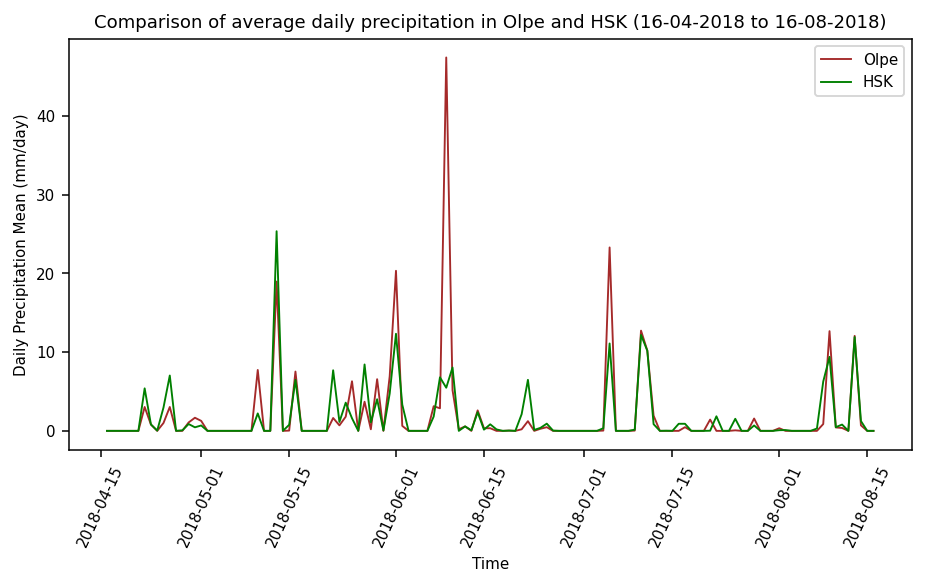

In [63]:
fig = plt.figure(dpi= 136, figsize=(8,4))
plt.rcParams.update({'font.size': 8})

#Olpe_and_HSK.reset_index(inplace=True)
plt.plot('date','avg_daily_prep_x',  data=Olpe_and_HSK, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('date','avg_daily_prep_y',  data=Olpe_and_HSK, marker='', markerfacecolor='green',  color='green', linewidth=1)

plt.legend(['Olpe', 'HSK'])


plt.xlabel('Time')
plt.ylabel('Daily Precipitation Mean (mm/day)')
plt.title('Comparison of average daily precipitation in Olpe and HSK (16-04-2018 to 16-08-2018)')
plt.xticks(rotation=65)

plt.show()

In [64]:
#HSK_August.tail()
#del may['index']
del may['cumilative_prep_Olpe']
del may['cumilative_prep_HSK']
may.insert(loc=1, column='cumilative_prep_Olpe', value=(np.cumsum(may['avg_daily_prep_x'])))
may.insert(loc=3, column='cumilative_prep_HSK', value=(np.cumsum(may['avg_daily_prep_y'])))
may

,avg_daily_prep_x,cumilative_prep_Olpe,avg_daily_prep_y,cumilative_prep_HSK
date,,,,
2018-04-16,0.000000,0.000000,0.000000,0.000000
2018-04-17,0.000000,0.000000,0.000000,0.000000
2018-04-18,0.000000,0.000000,0.000000,0.000000
2018-04-19,0.000000,0.000000,0.000000,0.000000
2018-04-20,0.000000,0.000000,0.000000,0.000000
2018-04-21,0.000000,0.000000,0.000000,0.000000
2018-04-22,3.033333,3.033333,5.400000,5.400000
2018-04-23,0.800000,3.833333,0.816667,6.216667
2018-04-24,0.000000,3.833333,0.033333,6.250000


In [65]:
del june['cumilative_prep_Olpe']
del june['cumilative_prep_HSK']
june.insert(loc=1, column='cumilative_prep_Olpe', value=(np.cumsum(june['avg_daily_prep_x'])))
june.insert(loc=3, column='cumilative_prep_HSK', value=(np.cumsum(june['avg_daily_prep_y'])))
june

,avg_daily_prep_x,cumilative_prep_Olpe,avg_daily_prep_y,cumilative_prep_HSK
date,,,,
2018-05-15,0.033333,0.033333,0.766667,0.766667
2018-05-16,7.533333,7.566667,6.483333,7.250000
2018-05-17,0.000000,7.566667,0.000000,7.250000
2018-05-18,0.000000,7.566667,0.000000,7.250000
2018-05-19,0.000000,7.566667,0.000000,7.250000
2018-05-20,0.000000,7.566667,0.000000,7.250000
2018-05-21,0.000000,7.566667,0.000000,7.250000
2018-05-22,1.633333,9.200000,7.700000,14.950000
2018-05-23,0.700000,9.900000,1.133333,16.083333


In [66]:
del july['cumilative_prep_Olpe']
del july['cumilative_prep_HSK']
july.insert(loc=1, column='cumilative_prep_Olpe', value=(np.cumsum(july['avg_daily_prep_x'])))
july.insert(loc=3, column='cumilative_prep_HSK', value=(np.cumsum(july['avg_daily_prep_y'])))
july

,avg_daily_prep_x,cumilative_prep_Olpe,avg_daily_prep_y,cumilative_prep_HSK
date,,,,
2018-06-15,0.333333,0.333333,0.150000,0.150000
2018-06-16,0.333333,0.666667,0.833333,0.983333
2018-06-17,0.000000,0.666667,0.183333,1.166667
2018-06-18,0.000000,0.666667,0.000000,1.166667
2018-06-19,0.033333,0.700000,0.033333,1.200000
2018-06-20,0.000000,0.700000,0.000000,1.200000
2018-06-21,0.200000,0.900000,2.116667,3.316667
2018-06-22,1.233333,2.133333,6.483333,9.800000
2018-06-23,0.000000,2.133333,0.116667,9.916667


In [67]:
del aug['cumilative_prep_Olpe']
del aug['cumilative_prep_HSK']
aug.insert(loc=1, column='cumilative_prep_Olpe', value=(np.cumsum(aug['avg_daily_prep_x'])))
aug.insert(loc=3, column='cumilative_prep_HSK', value=(np.cumsum(aug['avg_daily_prep_y'])))
aug

,avg_daily_prep_x,cumilative_prep_Olpe,avg_daily_prep_y,cumilative_prep_HSK
date,,,,
2018-07-15,0.000000,0.000000,0.000000,0.000000
2018-07-16,0.000000,0.000000,0.900000,0.900000
2018-07-17,0.466667,0.466667,0.900000,1.800000
2018-07-18,0.000000,0.466667,0.000000,1.800000
2018-07-19,0.000000,0.466667,0.000000,1.800000
2018-07-20,0.000000,0.466667,0.000000,1.800000
2018-07-21,1.433333,1.900000,0.016667,1.816667
2018-07-22,0.000000,1.900000,1.850000,3.666667
2018-07-23,0.000000,1.900000,0.000000,3.666667


In [68]:
#may.reset_index(inplace=True)
#may['avg_daily_prep_x'].cumsum()
may

,avg_daily_prep_x,cumilative_prep_Olpe,avg_daily_prep_y,cumilative_prep_HSK
date,,,,
2018-04-16,0.000000,0.000000,0.000000,0.000000
2018-04-17,0.000000,0.000000,0.000000,0.000000
2018-04-18,0.000000,0.000000,0.000000,0.000000
2018-04-19,0.000000,0.000000,0.000000,0.000000
2018-04-20,0.000000,0.000000,0.000000,0.000000
2018-04-21,0.000000,0.000000,0.000000,0.000000
2018-04-22,3.033333,3.033333,5.400000,5.400000
2018-04-23,0.800000,3.833333,0.816667,6.216667
2018-04-24,0.000000,3.833333,0.033333,6.250000


In [69]:
may.reset_index(inplace=True)
june.reset_index(inplace=True)
july.reset_index(inplace=True)
aug.reset_index(inplace=True)

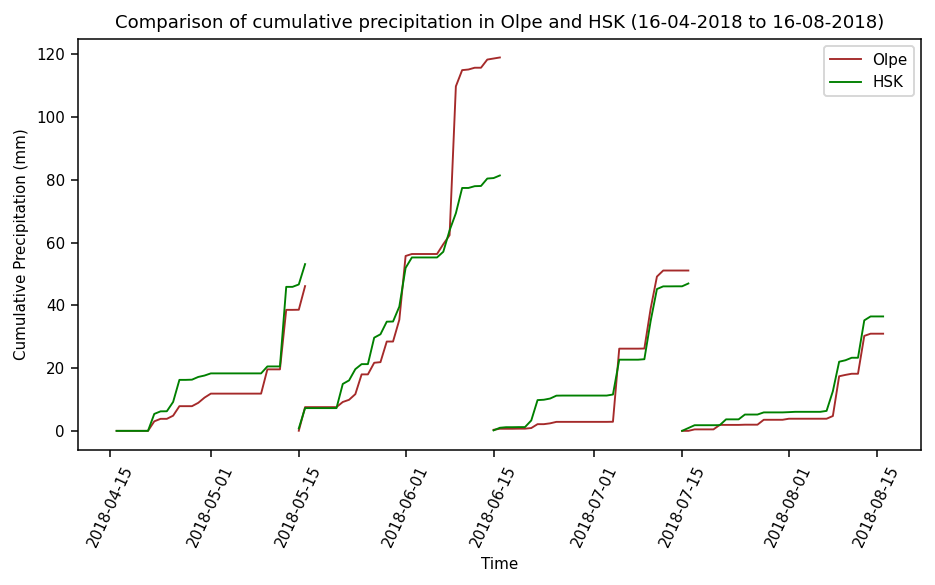

In [70]:
fig = plt.figure(dpi= 136, figsize=(8,4))
plt.rcParams.update({'font.size': 8})

plt.plot('date','cumilative_prep_Olpe',  data=may, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('date','cumilative_prep_HSK',  data=may, marker='', markerfacecolor='green',  color='green', linewidth=1)

plt.plot('date','cumilative_prep_Olpe',  data=june, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('date','cumilative_prep_HSK',  data=june, marker='', markerfacecolor='green',  color='green', linewidth=1)

plt.plot('date','cumilative_prep_Olpe',  data=july, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('date','cumilative_prep_HSK',  data=july, marker='', markerfacecolor='green',  color='green', linewidth=1)

plt.plot('date','cumilative_prep_Olpe',  data=aug, marker='', markerfacecolor='brown',  color='brown', linewidth=1)
plt.plot('date','cumilative_prep_HSK',  data=aug, marker='', markerfacecolor='green',  color='green', linewidth=1)

plt.legend(['Olpe', 'HSK'])

plt.xlabel('Time')
plt.ylabel('Cumulative Precipitation (mm)')
plt.title('Comparison of cumulative precipitation in Olpe and HSK (16-04-2018 to 16-08-2018)')
plt.xticks(rotation=65)

plt.savefig('C:/Users/tazbi/Downloads/Geoinformatics/Exam/MIE_2.02_WS2021_II_Exam-master/exercise_6/cumulative_prec_10_counties')

plt.show()